In [11]:
import tensorflow as tf
import os
import numpy as np

from tensorflow import keras

In [12]:
os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [13]:
imdb = keras.datasets.imdb

In [14]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [15]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.
    
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

In [18]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000, )))
    model.add(keras.layers.Dense(16, activation=tf.nn.relu))
    model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

    model.compile(optimizer=keras.optimizers.RMSprop(),
                  loss=keras.losses.binary_crossentropy,
                  metrics=[keras.metrics.binary_accuracy])
    return model

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
model = create_model()
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.5283 - binary_accuracy: 0.7865 - val_loss: 0.3947 - val_binary_accuracy: 0.8671
Epoch 2/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.3073 - binary_accuracy: 0.9035 - val_loss: 0.3088 - val_binary_accuracy: 0.8853
Epoch 3/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.2225 - binary_accuracy: 0.9281 - val_loss: 0.2802 - val_binary_accuracy: 0.8912
Epoch 4/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1751 - binary_accuracy: 0.9448 - val_loss: 0.2789 - val_binary_accuracy: 0.8885
Epoch 5/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1413 - binary_accuracy: 0.9559 - val_loss: 0.2795 - val_binary_accuracy: 0.8897
Epoch 6/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.1181 - binary_accuracy: 0.9633 - val_loss: 0.2976 - val_bi

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'val_loss', 'loss', 'val_binary_accuracy'])

In [22]:
import matplotlib.pyplot as plt

train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

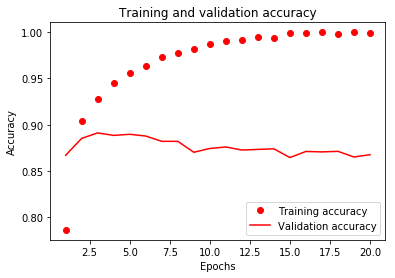

In [23]:
plt.clf()
train_acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, train_acc, 'ro', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
full_model = create_model()
full_model.fit(x_train, y_train, epochs=4, batch_size=512)
full_model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.4437 - binary_accuracy: 0.8196
Epoch 2/4
25000/25000 [==============================] - 2s 79us/step - loss: 0.2527 - binary_accuracy: 0.9101
Epoch 3/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.1965 - binary_accuracy: 0.9286
Epoch 4/4
25000/25000 [==============================] - 2s 94us/step


[0.3305183459854126, 0.87164]

In [27]:
one_hidden_model = keras.Sequential([
    keras.layers.Dense(16, activation=keras.activations.relu, input_shape=(10000, )),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])
one_hidden_model.compile(optimizer=keras.optimizers.RMSprop(),
                         loss=keras.losses.binary_crossentropy,
                         metrics=[keras.metrics.binary_accuracy])
one_hidden_history = one_hidden_model.fit(x_train, y_train,
                                          epochs=4,
                                          batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.4399 - binary_accuracy: 0.8316: 0s - loss: 0.4546 - binary_accuracy: 0
Epoch 2/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.2692 - binary_accuracy: 0.9089
Epoch 3/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2157 - binary_accuracy: 0.9260
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.1844 - binary_accuracy: 0.9360


In [28]:
one_hidden_model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 101us/step


[0.28445223755836485, 0.88496]

In [33]:
three_hidden_model = keras.Sequential([
    keras.layers.Dense(16, activation=keras.activations.relu, input_shape=(10000, )),
    keras.layers.Dense(16, activation=keras.activations.relu),
    keras.layers.Dense(16, activation=keras.activations.relu),    
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])
three_hidden_model.compile(optimizer=keras.optimizers.RMSprop(),
                         loss=keras.losses.binary_crossentropy,
                         metrics=[keras.metrics.binary_accuracy])
three_hidden_history = three_hidden_model.fit(x_train, y_train,
                                          epochs=3,
                                          batch_size=512)

Epoch 1/3
25000/25000 [==============================] - 2s 95us/step - loss: 0.4649 - binary_accuracy: 0.8035
Epoch 2/3
25000/25000 [==============================] - 2s 73us/step - loss: 0.2478 - binary_accuracy: 0.9115
Epoch 3/3
25000/25000 [==============================] - 2s 69us/step - loss: 0.1912 - binary_accuracy: 0.9304


In [34]:
three_hidden_model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 116us/step


[0.2926404519367218, 0.88552]

In [36]:
tanh_model = keras.Sequential([
    keras.layers.Dense(16, activation=keras.activations.tanh, input_shape=(10000, )),    
    keras.layers.Dense(16, activation=keras.activations.tanh),    
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])
tanh_model.compile(optimizer=keras.optimizers.RMSprop(),
                   loss=keras.losses.binary_crossentropy,
                   metrics=[keras.metrics.binary_accuracy])
tanh_history = tanh_model.fit(x_train, y_train,
                              epochs=4,
                              batch_size=512)
tanh_model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.4174 - binary_accuracy: 0.8315
Epoch 2/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.2342 - binary_accuracy: 0.9118
Epoch 3/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.1780 - binary_accuracy: 0.9343
Epoch 4/4
25000/25000 [==============================] - 2s 99us/step


[0.3434072085046768, 0.87324]

In [44]:
mse_model = keras.Sequential([
    keras.layers.Dense(16, activation=keras.activations.relu, input_shape=(10000, )),    
    keras.layers.Dense(16, activation=keras.activations.relu),    
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])
mse_model.compile(optimizer=keras.optimizers.RMSprop(),
                   loss=keras.losses.mean_squared_error,
                   metrics=[keras.metrics.binary_accuracy])
mse_history = mse_model.fit(x_train, y_train,
                              epochs=4,
                              batch_size=512)
mse_model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 110us/step - loss: 0.1521 - binary_accuracy: 0.8248
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.0801 - binary_accuracy: 0.9095
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.0601 - binary_accuracy: 0.9295
Epoch 4/4
25000/25000 [==============================] - 3s 108us/step


[0.0854564205121994, 0.88436]